<a href="https://colab.research.google.com/github/Anas-Issa/HealthCheck/blob/48-OralCancerPrediction/Notebooks/OralCancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Oral cancer appears as a growth or sore in the mouth that does not go away. Oral cancer, which includes cancers of the lips, tongue, cheeks, floor of the mouth, hard and soft palate, sinuses, and pharynx (throat), can be life threatening if not diagnosed and treated early.

The following Machine Learning Models uses different algorithms to predict whether a person has an oral cancer or not.

The algorithms implemented are:
  - Decision Tree
  - RandomForest
  - Support Vector Machines

In [1]:
# Importing Required Libraries 
import glob
import numpy as np
from PIL import Image
from numpy import array
from sklearn import svm
from sklearn import tree
from google.colab import files
from keras.preprocessing import image
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, f1_score, recall_score, precision_score

# Preparing Dataset

### This next section to be executed only ONCE

**Linking Kaggle with Google Colab**

In [2]:
#install the dependencies
!pip install kaggle

**Downloading & Extracting the Dataset**

The 'kaggle.json' file is to be changed to be your json file (the API command), which can be downloaded from [HERE](https://www.kaggle.com/shivam17299/oral-cancer-lips-and-tongue-images)

In [3]:
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"anasissa","key":"b25665e966dac0080e3eeb450d5b5874"}'}

In [4]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

#change the permisssion
!chmod 600 ~/.kaggle/kaggle.json

In [5]:
!kaggle datasets download -d shivam17299/oral-cancer-lips-and-tongue-images

 87% 24.0M/27.7M [00:00<00:00, 55.9MB/s]
100% 27.7M/27.7M [00:00<00:00, 69.7MB/s]


In [6]:
!unzip '/content/oral-cancer-lips-and-tongue-images.zip' -d '/content/Dataset'

Archive:  /content/oral-cancer-lips-and-tongue-images.zip
  inflating: /content/Dataset/OralCancer/cancer/01960a64-cfe8-444d-bbc5-575c15389a21.jpg  
  inflating: /content/Dataset/OralCancer/cancer/1200px-ZungenCa2a.jpg  
  inflating: /content/Dataset/OralCancer/cancer/18b79305-949e-4ed8-849c-ec5d5a794752.jpg  
  inflating: /content/Dataset/OralCancer/cancer/3-s2.0-B9780443100734500148-f10-07-9780443100734.jpg  
  inflating: /content/Dataset/OralCancer/cancer/324950_1100.jpg  
  inflating: /content/Dataset/OralCancer/cancer/41415_2000_Article_BF4800481_Fig1_HTML.jpg  
  inflating: /content/Dataset/OralCancer/cancer/41457tn.jpg  
  inflating: /content/Dataset/OralCancer/cancer/46e21e7be60567c4b9b2ca9018587f88_XL.jpg  
  inflating: /content/Dataset/OralCancer/cancer/949b9f09-aa54-454e-b631-b6d98e079f45.jpg  
  inflating: /content/Dataset/OralCancer/cancer/C0235749-Mouth_cancer-SPL-20170511085515620.jpg  
  inflating: /content/Dataset/OralCancer/cancer/Carcinomaoftherighttongue_OCT-2016110

### Preparing the dataset

In [2]:
cancer_imgs = glob.glob('/content/Dataset/OralCancer/cancer' + '/*.jpg')
non_cancer_imgs = glob.glob('/content/Dataset/OralCancer/non-cancer' + '/*.jpg')

In [3]:
# label 1 represents the cancer images & label 0 represents the non-cancer images

dataset = []
labels = []

for img in cancer_imgs:
  dataset.append(image.img_to_array(image.load_img(img, target_size=(64, 64))))
  labels.append(1)

for img in non_cancer_imgs:
  dataset.append(image.img_to_array(image.load_img(img, target_size=(64, 64))))
  labels.append(0)
  
dataset = array(dataset)

/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


In [4]:
X_train, X_test, y_train, y_test = train_test_split(dataset, labels, test_size=0.25, random_state=42)
X_train = X_train.reshape(len(X_train),3*64*64)
X_test = X_test.reshape(len(X_test),3*64*64)

**Smaple of the dataset**

Cancer Images: 


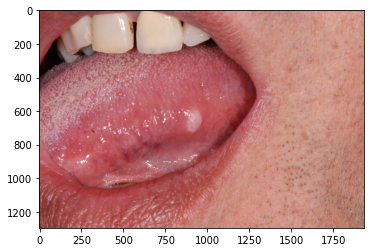

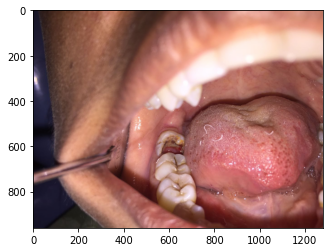

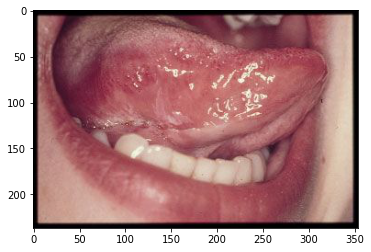

In [5]:
import matplotlib.image as mpimg 
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
%matplotlib inline


print('Cancer Images: ')
for img in cancer_imgs[:3]:
  testim = mpimg.imread(img)
  plt.figure()
  imshow(testim)

Non-Cancer Images: 


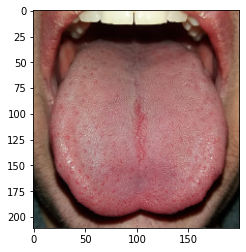

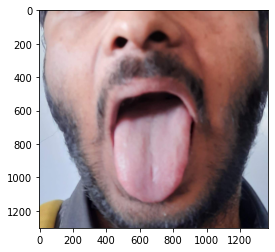

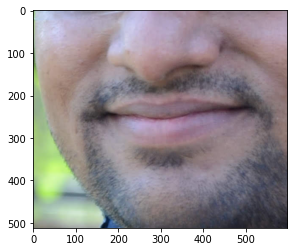

In [6]:
print('Non-Cancer Images: ')
for img in non_cancer_imgs[:3]:
  testim = mpimg.imread(img)
  plt.figure()
  imshow(testim)

### Helper Function To be used in Evaluating the Model

In [7]:
# evaluate_model function is taken from /Notebooks/FetalHealthClassification_Imbalanced.ipynb
def evaluate_model(clf, X_test, y_test, model_name):
  print('--------------------------------------------')
  print('Model ', model_name)
  y_pred = clf.predict(X_test)
  f1 = f1_score(y_test, y_pred.round(), average='weighted')
  recall = recall_score(y_test, y_pred.round(), average='weighted')
  precision = precision_score(y_test, y_pred.round(), average='weighted')
  print(classification_report(y_test, y_pred.round()))
  print("F1 Score ", f1)
  print("Recall ", recall)
  print("Precision ", precision)

# Models

**Decision Tree**

In [8]:
clf_tree = tree.DecisionTreeClassifier(random_state=42)
clf_tree = clf_tree.fit(X_train, y_train)

**RandomForest**

In [9]:
sc = StandardScaler()
X2_train = sc.fit_transform(X_train)
X2_test = sc.transform(X_test)

In [10]:
clf_rf = RandomForestClassifier(n_estimators=2000,criterion='entropy', random_state=0)
clf_rf.fit(X2_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=2000,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

**Support Vector Machines (SVMs)**

In [11]:
clf_svm = svm.SVC(kernel='linear') # Linear Kernel
clf_svm.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

# Models Evaluation

In [12]:
evaluate_model(clf_tree, X_test, y_test, 'Decision Tree')
evaluate_model(clf_rf, X2_test, y_test, 'RandomForest')
evaluate_model(clf_svm, X_test, y_test, 'SVM')

--------------------------------------------
Model  Decision Tree
              precision    recall  f1-score   support

           0       0.57      0.44      0.50         9
           1       0.72      0.81      0.76        16

    accuracy                           0.68        25
   macro avg       0.65      0.63      0.63        25
weighted avg       0.67      0.68      0.67        25

F1 Score  0.6694117647058824
Recall  0.68
Precision  0.6679365079365078
--------------------------------------------
Model  RandomForest
              precision    recall  f1-score   support

           0       0.86      0.67      0.75         9
           1       0.83      0.94      0.88        16

    accuracy                           0.84        25
   macro avg       0.85      0.80      0.82        25
weighted avg       0.84      0.84      0.83        25

F1 Score  0.8347058823529412
Recall  0.84
Precision  0.8419047619047619
--------------------------------------------
Model  SVM
              p

In [13]:
# The file will be saved in colab directory once the following code is executed
import pickle
filename = 'oral-cancer-model.pkl'
pickle.dump(clf_svm, open(filename, 'wb'))

In [14]:
f = pickle.load(open(filename, 'rb'))

In [15]:
f.predict(X_test)

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 0])